In [1]:
import os
import tempfile
import scanpy as sc
import scvi
import scanpy as sc
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.io import mmread

/users/PAS1475/guoqi/.conda/envs/scvi-env-0926/lib/python3.9/site-packages/scvi/_settings.py:63: UserWarning: Since v1.0.0, scvi-tools no longer uses a random seed by default. Run `scvi.settings.seed = 0` to reproduce results from previous versions.
  self.seed = seed
/users/PAS1475/guoqi/.conda/envs/scvi-env-0926/lib/python3.9/site-packages/scvi/_settings.py:70: UserWarning: Setting `dl_pin_memory_gpu_training` is deprecated in v1.0 and will be removed in v1.1. Please pass in `pin_memory` to the data loaders instead.
  self.dl_pin_memory_gpu_training = (
/users/PAS1475/guoqi/.conda/envs/scvi-env-0926/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
import anndata

In [6]:
sys.path.append("/fs/ess/PAS1475/guoqi/sci_atlas/Lung_splitdata/HLCA_reproducibility/scripts/")
import preprocessing
import utils

In [29]:
# path to results directory:
dir_out = "/fs/ess/PAS1475/guoqi/sci_atlas/Lung_splitdata/sci_split_result"

In [27]:
sp_exp = mmread("/fs/ess/PAS1475/guoqi/sci_atlas/raw_data/Cheng/health_intersectgene_qc_count_1116.mtx")
sp_exp = sp_exp.tocsc()

In [26]:
gene_name = pd.read_csv("/fs/ess/PAS1475/guoqi/sci_atlas/raw_data/Cheng/health_intersectgene_qc_gene_1116.csv",index_col=0)
gene_name

,gene
1,Mrpl15
2,Tcea1
3,Atp6v1h
4,Rb1cc1
5,Pcmtd1
...,...
10170,Prps2
10171,Msl3
10172,Arhgap6
10173,Hccs


In [25]:
meta_update = pd.read_csv("/fs/ess/PAS1475/guoqi/sci_atlas/raw_data/Cheng/health_intersectgene_qc_meta_1116.csv", index_col=0)
meta_update

,orig.ident,nCount_RNA,nFeature_RNA,Study_name,Vendor,Species,Strain,Mice_number,Sex,Age,...,Number_of_cells/spots,Number_of_genes,Gene_naming_format,Cell_type_annotation,previous_celltype,previous_subcelltype,percent.mt,harmonized_majorct,nCount_integrated,nFeature_integrated
AAACCTGAGCACACAG_uninj_sample1,SCI00301,7815,2315,Lee_2021_v2,Jackson Laboratories (000664),Mouse,C57BL/6J,5.0,Female,8-10 weeks,...,2757,NaN,Gene symbol,Yes,Microglia,Unknown,2.782267,Microglia,0,0
AAACCTGAGCCTCGTG_uninj_sample1,SCI00301,2842,1251,Lee_2021_v2,Jackson Laboratories (000664),Mouse,C57BL/6J,5.0,Female,8-10 weeks,...,2757,NaN,Gene symbol,Yes,Ependymal,Unknown,6.150405,Ependymal cells,0,0
AAACCTGCAGACTCGC_uninj_sample1,SCI00301,2048,1080,Lee_2021_v2,Jackson Laboratories (000664),Mouse,C57BL/6J,5.0,Female,8-10 weeks,...,2757,NaN,Gene symbol,Yes,Endothelial,Unknown,4.156171,Endothelial cells,0,0
AAACCTGGTAAAGGAG_uninj_sample1,SCI00301,2198,999,Lee_2021_v2,Jackson Laboratories (000664),Mouse,C57BL/6J,5.0,Female,8-10 weeks,...,2757,NaN,Gene symbol,Yes,Ependymal,Unknown,4.881712,Ependymal cells,0,0
AAACCTGGTAAGGATT_uninj_sample1,SCI00301,2545,1140,Lee_2021_v2,Jackson Laboratories (000664),Mouse,C57BL/6J,5.0,Female,8-10 weeks,...,2757,NaN,Gene symbol,Yes,Ependymal,Unknown,5.550270,Ependymal cells,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGAGAATACAC_uninj_sample3,SCI00303,3896,1619,Lee_2021_v3,Jackson Laboratories (000664),Mouse,C57BL/6J,NaN,Female,8-10 weeks,...,8858,NaN,Gene symbol,Yes,Endothelial,Unknown,4.782609,Endothelial cells,0,0
TTTGTTGCAGTACTAC_uninj_sample3,SCI00303,12280,3721,Lee_2021_v3,Jackson Laboratories (000664),Mouse,C57BL/6J,NaN,Female,8-10 weeks,...,8858,NaN,Gene symbol,Yes,Ependymal,Unknown,5.528310,Ependymal cells,0,0
TTTGTTGGTAAGCAAT_uninj_sample3,SCI00303,7099,3029,Lee_2021_v3,Jackson Laboratories (000664),Mouse,C57BL/6J,NaN,Female,8-10 weeks,...,8858,NaN,Gene symbol,Yes,OPC,Unknown,4.882640,Oligodendrocyte lineage,0,0
TTTGTTGTCACCTGTC_uninj_sample3,SCI00303,9745,3028,Lee_2021_v3,Jackson Laboratories (000664),Mouse,C57BL/6J,NaN,Female,8-10 weeks,...,8858,NaN,Gene symbol,Yes,Endothelial,Unknown,4.623722,Endothelial cells,0,0


In [28]:
#construct anndata
adata = anndata.AnnData(X=sp_exp)
adata.var = gene_name
adata.var_names=adata.var["gene"]
adata.obs = meta_update
adata.X = adata.X.astype(float)
adata.layers['counts'] = adata.X

/users/PAS1475/guoqi/.conda/envs/scvi-env-0926/lib/python3.9/site-packages/anndata/_core/anndata.py:788: UserWarning: 
AnnData expects .var.index to contain strings, but got values like:
    [1, 2, 3, 4, 5]

    Inferred to be: integer

  value_idx = self._prep_dim_index(value.index, attr)


In [14]:
"""
unique_values = np.unique(meta_update["Study_name"])
print(unique_values)
study_of_interest1 = "Lee_2021_v2"
study_of_interest2 = "Lee_2021_v3"
my_vector = [study_of_interest1, study_of_interest2]
adata_interest1 = adata[adata.obs.Study_name == study_of_interest1, :].copy()
adata_interest2 = adata[adata.obs.Study_name == study_of_interest2, :].copy()
adata_interest = anndata.concat([adata_interest1, adata_interest2])
adata_interest
"""

['Cheng_2022' 'Khoutorsky_2022' 'Lee_2021_v2' 'Lee_2021_v3' 'Levine_2021'
 'Levine_2022' 'Pluchino_2023' 'Popovich_2022' 'Svensson_2021' 'Zhu_2022']


In [39]:
adata.write('/fs/ess/PAS1475/guoqi/sci_atlas/Lung_splitdata/sci_split_result/Lee_backup.h5ad')

In [8]:
adata = anndata.read_h5ad('/fs/ess/PAS1475/guoqi/sci_atlas/Lung_splitdata/sci_split_result/Lee_backup.h5ad')

In [9]:
median_libsize = np.median(adata.X.sum(axis=1).flatten(), axis=1)

In [10]:
sc.pp.normalize_per_cell(adata, counts_per_cell_after=median_libsize[0, 0])

/users/PAS1475/guoqi/.conda/envs/scvi-env-0926/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [11]:
sc.tl.pca(adata)

In [12]:
n_pcs = 50

In [13]:
covariates = [
    "orig.ident",
    "nCount_RNA",
    "nFeature_RNA",
    "Study_name",
    "previous_celltype",
    "harmonized_majorct",
    "Sex",
    "Age"
]

In [14]:
#Create shuffled assignment of single cell platform 
sample_to_scplatform = adata.obs.groupby("orig.ident").agg(
        {"Study_name": "first"}
)

/tmp/slurmtmp.24735952/ipykernel_153203/3101678207.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sample_to_scplatform = adata.obs.groupby("orig.ident").agg(


In [15]:
sample_to_scplatform

,Study_name
orig.ident,
SCI00301,Lee_2021_v2
SCI00302,Lee_2021_v2
SCI00303,Lee_2021_v3


In [16]:
for i in range(10):
    np.random.shuffle(sample_to_scplatform.Study_name)
    adata.obs["single_cell_platform_shuffled_" + str(i)] = adata.obs["orig.ident"].map(
        dict(
            zip(
                sample_to_scplatform.index,
                sample_to_scplatform.Study_name,
            )
        )
    )
    covariates.append("single_cell_platform_shuffled_" + str(i))

/tmp/slurmtmp.24735952/ipykernel_153203/1707448093.py:2: UserWarning: you are shuffling a 'Series' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(sample_to_scplatform.Study_name)
/tmp/slurmtmp.24735952/ipykernel_153203/1707448093.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.random.shuffle(sample_to_scplatform.Study_name)
/tmp/slurmtmp.24735952/ipykernel_153203/1707448093.py:2: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  np.random.shuffle(

In [41]:
print(adata.obs)

                               orig.ident  nCount_RNA  nFeature_RNA  \
AAACCTGAGCACACAG_uninj_sample1   SCI00301        7815          2315   
AAACCTGAGCCTCGTG_uninj_sample1   SCI00301        2842          1251   
AAACCTGCAGACTCGC_uninj_sample1   SCI00301        2048          1080   
AAACCTGGTAAAGGAG_uninj_sample1   SCI00301        2198           999   
AAACCTGGTAAGGATT_uninj_sample1   SCI00301        2545          1140   
...                                   ...         ...           ...   
TTTGTTGAGAATACAC_uninj_sample3   SCI00303        3896          1619   
TTTGTTGCAGTACTAC_uninj_sample3   SCI00303       12280          3721   
TTTGTTGGTAAGCAAT_uninj_sample3   SCI00303        7099          3029   
TTTGTTGTCACCTGTC_uninj_sample3   SCI00303        9745          3028   
TTTGTTGTCACTTATC_uninj_sample3   SCI00303        6999          2359   

                                 Study_name                         Vendor  \
AAACCTGAGCACACAG_uninj_sample1  Lee_2021_v2  Jackson Laboratories (00

In [17]:
#Now check for every covariate, for every PC how much variance among the cells' PC scores the covariate can explain.
#Add this variance explained per PC up across PCs for every covariate. This will give us the total amount of variance explained per covariate.
var_explained = pd.DataFrame(index=range(n_pcs), columns=covariates + ["overall"])
print(var_explained)

   orig.ident nCount_RNA nFeature_RNA Study_name previous_celltype  \
0         NaN        NaN          NaN        NaN               NaN   
1         NaN        NaN          NaN        NaN               NaN   
2         NaN        NaN          NaN        NaN               NaN   
3         NaN        NaN          NaN        NaN               NaN   
4         NaN        NaN          NaN        NaN               NaN   
5         NaN        NaN          NaN        NaN               NaN   
6         NaN        NaN          NaN        NaN               NaN   
7         NaN        NaN          NaN        NaN               NaN   
8         NaN        NaN          NaN        NaN               NaN   
9         NaN        NaN          NaN        NaN               NaN   
10        NaN        NaN          NaN        NaN               NaN   
11        NaN        NaN          NaN        NaN               NaN   
12        NaN        NaN          NaN        NaN               NaN   
13        NaN       

In [18]:
for pc in range(n_pcs):
    #extract each pc for all cells
    y_true_unfiltered = adata.obsm["X_pca"][:, pc]
    #compute variance of each pc in all cells and store in the overall column
    var_explained.loc[pc, "overall"] = np.var(y_true_unfiltered)
    for cov in covariates:
        #extract each covariants
        x = adata.obs[cov].values.copy()
        #check whether has na, if has, filter out (we don't have any na in our dataset)
        #x_nans = np.vectorize(utils.check_if_nan)(x)
        #x = x[~x_nans]
        if len(x) != 0:
            #extracts the non-missing values of the current principal component and reshapes it.
            #y_true = y_true_unfiltered[~x_nans].reshape(-1, 1)
            y_true = y_true_unfiltered.reshape(-1, 1)
            if x.dtype in ["float32", "float", "float64"]:
                x = x.reshape(-1, 1)
            else:
                if len(set(x)) == 1:
                    var_explained.loc[pc, cov] = np.nan
                    continue
                x = pd.get_dummies(x)
                
            lrf = LinearRegression(fit_intercept=True).fit(
                x,
                y_true,
            )
            y_pred = lrf.predict(x)
            var_explained.loc[pc, cov] = np.var(y_pred)
total_variance_explained = np.sum(var_explained, axis=0).sort_values(ascending=False)
total_variance_explained_fractions = (
    total_variance_explained / total_variance_explained["overall"]
)

In [19]:
#Calculate mean over shuffling instances, add as one value to clean fractions:
total_variance_explained_clean = total_variance_explained_fractions[
    [
        x
        for x in total_variance_explained_fractions.index
        if not x.startswith("Processing_site_shuffled")
        and not x.startswith("single_cell_platform_shuffled")
    ]
]
total_variance_explained_clean["single_cell_platform_shuffled"] = np.mean(
    total_variance_explained_fractions[
        [
            x
            for x in total_variance_explained_fractions.index
            if x.startswith("single_cell_platform_")
        ]
    ]
)
stdev_single_cell_platform_shuffled = np.std(
    total_variance_explained_fractions[
        [
            x
            for x in total_variance_explained_fractions.index
            if x.startswith("single_cell_platform_")
        ]
    ]
)

In [20]:
total_variance_explained_clean.sort_values(ascending=False, inplace=True)

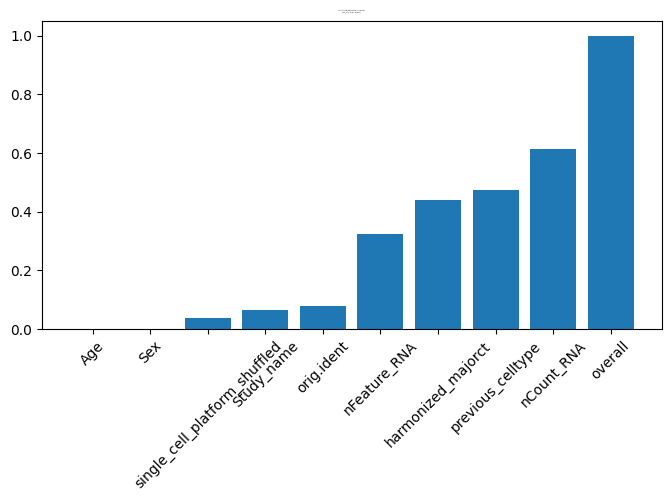

In [24]:
plt.figure(figsize=(8, 4))
plt.bar(
    total_variance_explained_clean[::-1].index,
    total_variance_explained_clean[::-1].values,
)
plt.title(
    f"covariate correlation with first 50 PCs\n(Lee_2021, whole dataset)",
    fontsize=1,
)  # \n({dominant_type})
plt.xticks(rotation=45)
plt.show()

In [49]:
""""
y_true_unfiltered = adata.obsm["X_pca"][:, 1]
y_true_unfiltered
var_explained.loc[1, "overall"] = np.var(y_true_unfiltered)
cov="Study_name"
x = adata.obs[cov].values.copy()
x = pd.get_dummies(x)
y_true=y_true_unfiltered
lrf = LinearRegression(fit_intercept=True).fit(
                x,
                y_true,
            )
y_pred = lrf.predict(x)
""""

In [26]:
total_variance_explained_clean

overall                               1.0
nCount_RNA                       0.612413
previous_celltype                0.474223
harmonized_majorct               0.439194
nFeature_RNA                      0.32493
orig.ident                       0.077028
Study_name                       0.065176
single_cell_platform_shuffled    0.038598
Sex                                   0.0
Age                                   0.0
dtype: object

In [27]:
res = pd.DataFrame(total_variance_explained_clean)
res.columns = ["fraction_of_variance_explained"]
res.loc["single_cell_platform_shuffled", "stdev"] = stdev_single_cell_platform_shuffled

In [30]:
res.to_csv(
    f"{dir_out}/Lee2021_variance_explained_per_covariate.csv"
)

In [32]:
(
    res.loc["Study_name", "fraction_of_variance_explained"]
    - res.loc["single_cell_platform_shuffled", "fraction_of_variance_explained"]
) / res.loc["single_cell_platform_shuffled", "stdev"]

1.0399613315032072

In [33]:
res

,fraction_of_variance_explained,stdev
overall,1.0,NaN
nCount_RNA,0.612413,NaN
previous_celltype,0.474223,NaN
harmonized_majorct,0.439194,NaN
nFeature_RNA,0.32493,NaN
orig.ident,0.077028,NaN
Study_name,0.065176,NaN
single_cell_platform_shuffled,0.038598,0.025556
Sex,0.0,NaN
Age,0.0,NaN
